In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# -----------------------------
# LOAD CLEANED DATA
# -----------------------------
INPUT_PATH = "data/claims_cleaned.csv"   # change if needed
OUTPUT_DIR = "results/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Loading cleaned dataset...")
df = pd.read_csv(INPUT_PATH, low_memory=False, parse_dates=["Accident Date"])

print("Data shape:", df.shape)
print(df.head(3))

Loading cleaned dataset...
Data shape: (2713697, 30)
  Assembly Date Accident Date  Age at Injury Gender  WCIO Part Of Body Code  \
0    2000-01-06    1998-12-08             49      M                     NaN   
1    2000-01-10    1999-10-29             30      M                     NaN   
2    2000-01-13    1999-12-27             46      F                     NaN   

  WCIO Part Of Body Description  WCIO Nature of Injury Code  \
0               LOWER BACK AREA                         NaN   
1               LOWER BACK AREA                         NaN   
2               LOWER BACK AREA                         NaN   

  WCIO Nature of Injury Description  WCIO Cause of Injury Code  \
0                    STRAIN OR TEAR                        NaN   
1                    STRAIN OR TEAR                        NaN   
2                    STRAIN OR TEAR                        NaN   

  WCIO Cause of Injury Description  ...               Highest Process  \
0                          LIFTING  ...

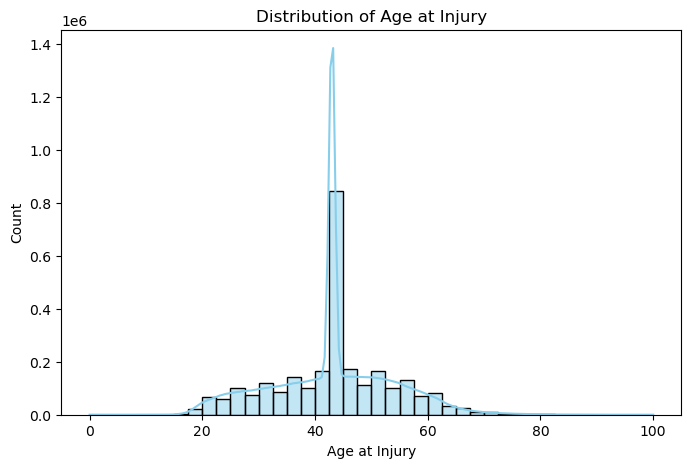

In [24]:
# -----------------------------
# 1. Question: What is the distribution of Age at Injury?
# -----------------------------
df_age = df[(df["Age at Injury"] >= 0) & (df["Age at Injury"] <= 100)]

plt.figure(figsize=(8,5))
sns.histplot(df_age["Age at Injury"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Age at Injury")
plt.xlabel("Age at Injury")
plt.ylabel("Count")
plt.savefig(os.path.join(OUTPUT_DIR, "age_distribution.png"))
plt.show()


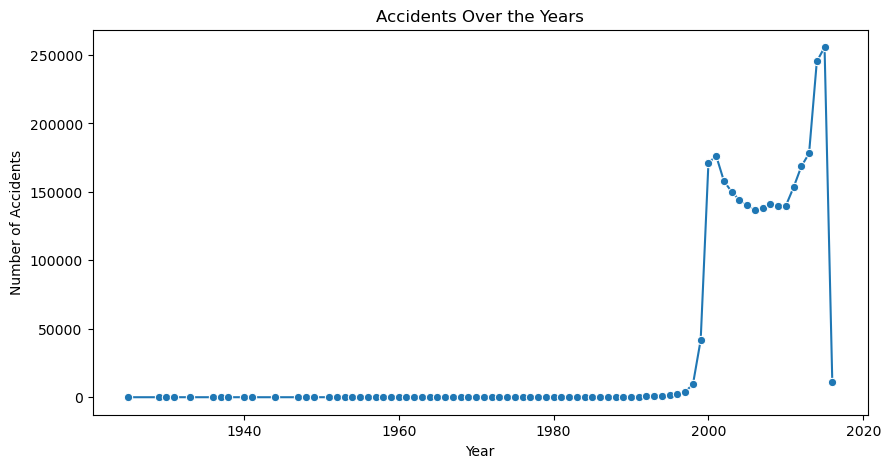

In [4]:
# -----------------------------
# 2. Question: How many accidents happened per year?
# -----------------------------
if "Accident_Year" in df.columns:
    accidents_per_year = df.groupby("Accident_Year")["Accident_Year"].count()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker="o")
    plt.title("Accidents Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Accidents")
    plt.savefig(os.path.join(OUTPUT_DIR, "accidents_per_year.png"))
    plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_27628\3387754881.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Accident_Weekday", order=order, palette="Set2")


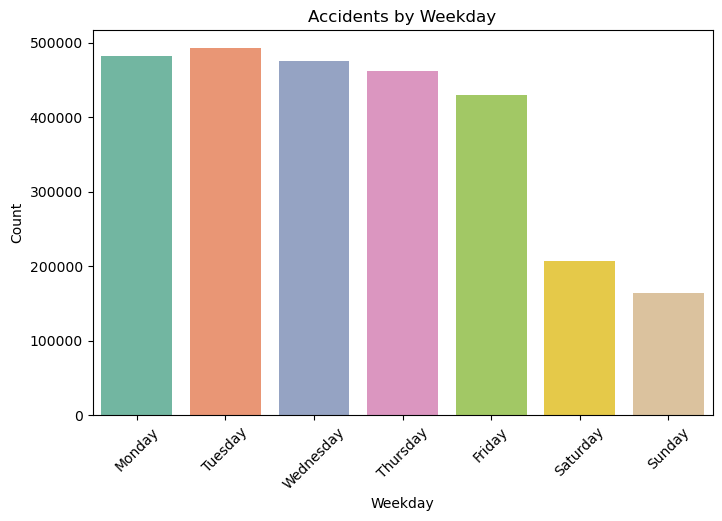

In [5]:
# -----------------------------
# 3️. Question: Which weekdays have the highest accident counts?
# -----------------------------
if "Accident_Weekday" in df.columns:
    plt.figure(figsize=(8,5))
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    sns.countplot(data=df, x="Accident_Weekday", order=order, palette="Set2")
    plt.title("Accidents by Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(OUTPUT_DIR, "accidents_by_weekday.png"))
    plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_27628\3638897371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_body_parts.values, y=top_body_parts.index, palette="viridis")


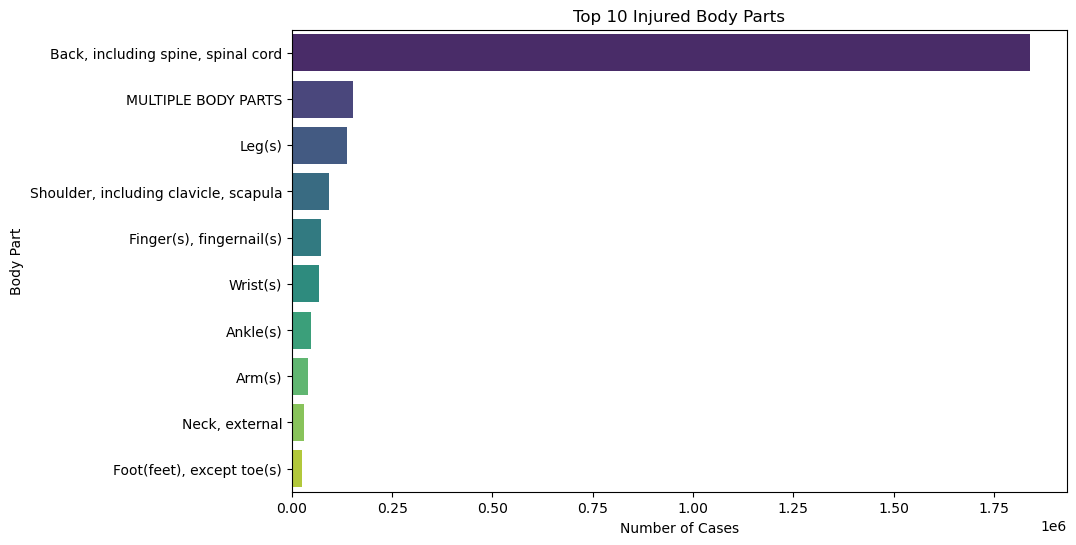

In [22]:
# -----------------------------
# 4️. Question: What are the top 10 Body Parts injured?
# -----------------------------
if "OIICS Part Of Body Description" in df.columns:
    top_body_parts = df["OIICS Part Of Body Description"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_body_parts.values, y=top_body_parts.index, palette="viridis")
    plt.title("Top 10 Injured Body Parts")
    plt.xlabel("Number of Cases")
    plt.ylabel("Body Part")
    plt.savefig(os.path.join(OUTPUT_DIR, "top_body_parts.png"))
    plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_27628\219305495.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_injury_nature.values, y=top_injury_nature.index, palette="magma")


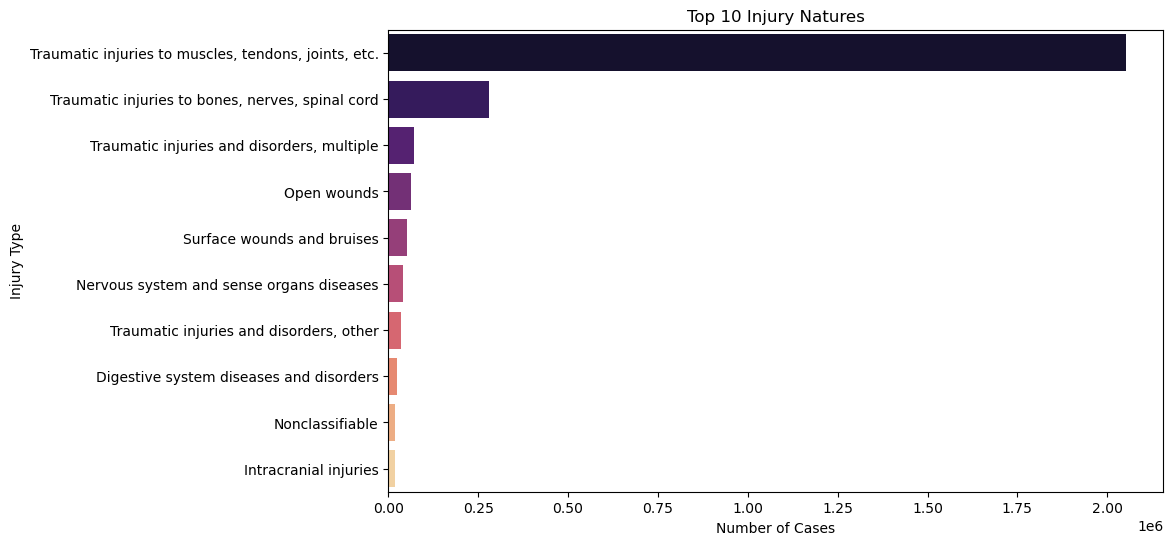

In [21]:
# -----------------------------
# 5️. Question: What are the most common Injury Natures?
# -----------------------------
if "OIICS Nature of Injury Description" in df.columns:
    top_injury_nature = df["OIICS Nature of Injury Description"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_injury_nature.values, y=top_injury_nature.index, palette="magma")
    plt.title("Top 10 Injury Natures")
    plt.xlabel("Number of Cases")
    plt.ylabel("Injury Type")
    plt.savefig(os.path.join(OUTPUT_DIR, "top_injury_nature.png"))
    plt.show()

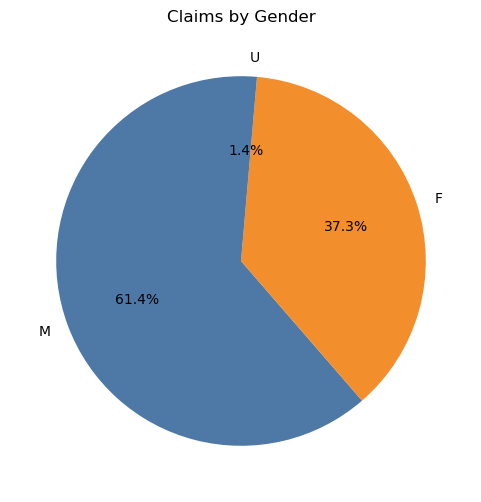

In [20]:
# -----------------------------
# 6️. Question: Distribution of Gender in claims
# -----------------------------
if "Gender" in df.columns:
    plt.figure(figsize=(6,6))
    df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#4e79a7","#f28e2b"])
    plt.title("Claims by Gender")
    plt.ylabel("")
    plt.savefig(os.path.join(OUTPUT_DIR, "gender_distribution.png"))
    plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_27628\2718962918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette="coolwarm")


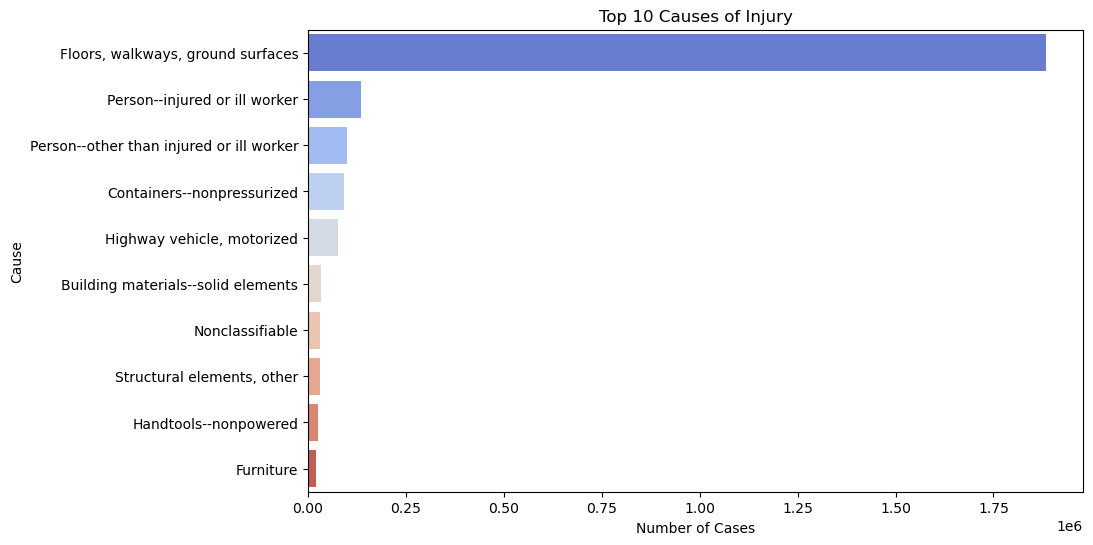

In [16]:
# -----------------------------
# 7. Top 10 Causes of Injury
# -----------------------------
if "OIICS Injury Source Description" in df.columns:
    top_causes = df["OIICS Injury Source Description"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_causes.values, y=top_causes.index, palette="coolwarm")
    plt.title("Top 10 Causes of Injury")
    plt.xlabel("Number of Cases")
    plt.ylabel("Cause")
    plt.savefig(os.path.join(OUTPUT_DIR, "top_injury_causes.png"))
    plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_27628\1532046237.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_carriers.values, y=top_carriers.index, palette="pastel")


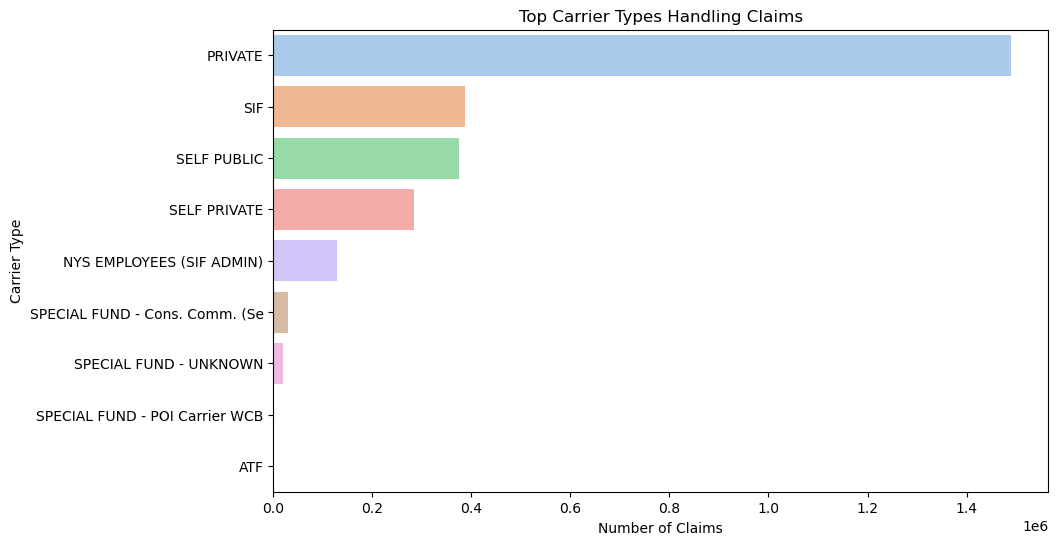

In [17]:
# -----------------------------
# 8. Carrier Type Distribution
# -----------------------------
if "Carrier Type" in df.columns:
    top_carriers = df["Carrier Type"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_carriers.values, y=top_carriers.index, palette="pastel")
    plt.title("Top Carrier Types Handling Claims")
    plt.xlabel("Number of Claims")
    plt.ylabel("Carrier Type")
    plt.savefig(os.path.join(OUTPUT_DIR, "carrier_types.png"))
    plt.show()

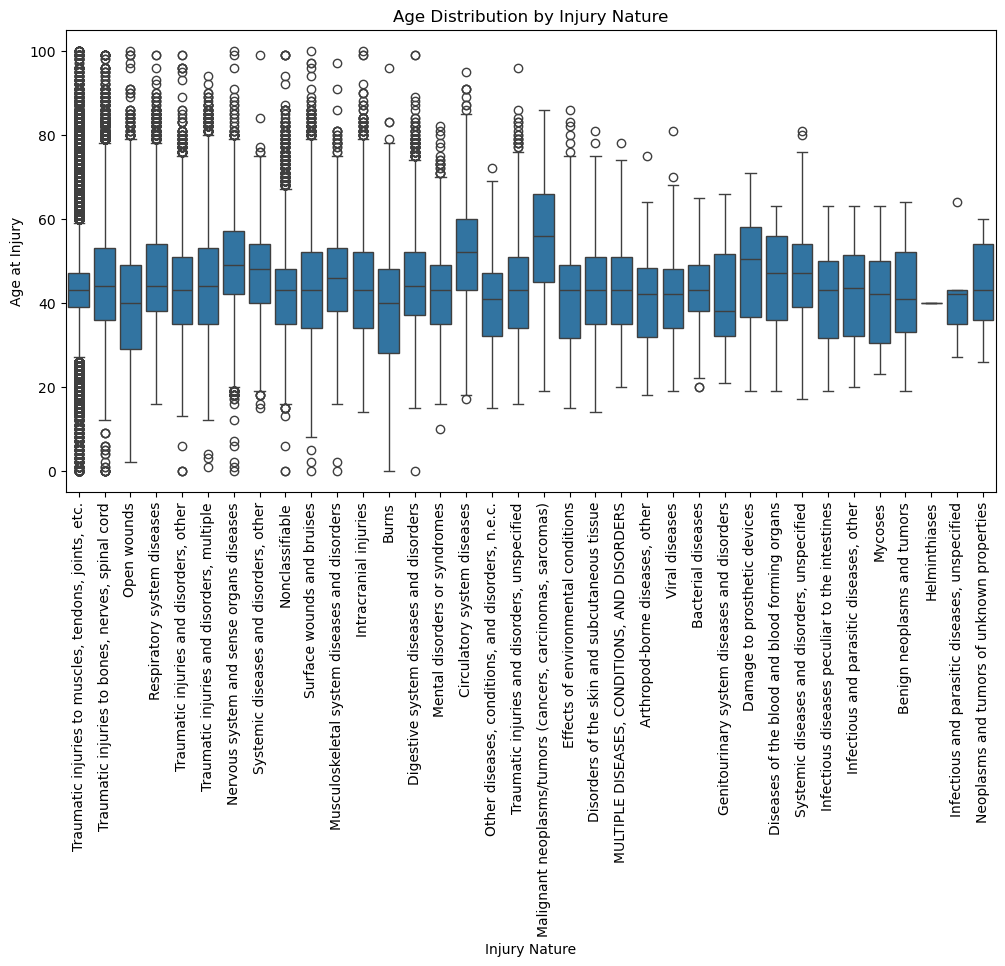

In [27]:
# -----------------------------
# 9. Age vs. Injury Nature 
# -----------------------------
if "OIICS Nature of Injury Description" in df.columns:
    df_age = df[(df["Age at Injury"] >= 0) & (df["Age at Injury"] <= 100)]

    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=df_age, 
        x="OIICS Nature of Injury Description", 
        y="Age at Injury"
    )
    plt.xticks(rotation=90)
    plt.title("Age Distribution by Injury Nature")
    plt.xlabel("Injury Nature")
    plt.ylabel("Age at Injury")
    plt.savefig(os.path.join(OUTPUT_DIR, "age_vs_injury_nature.png"))
    plt.show()

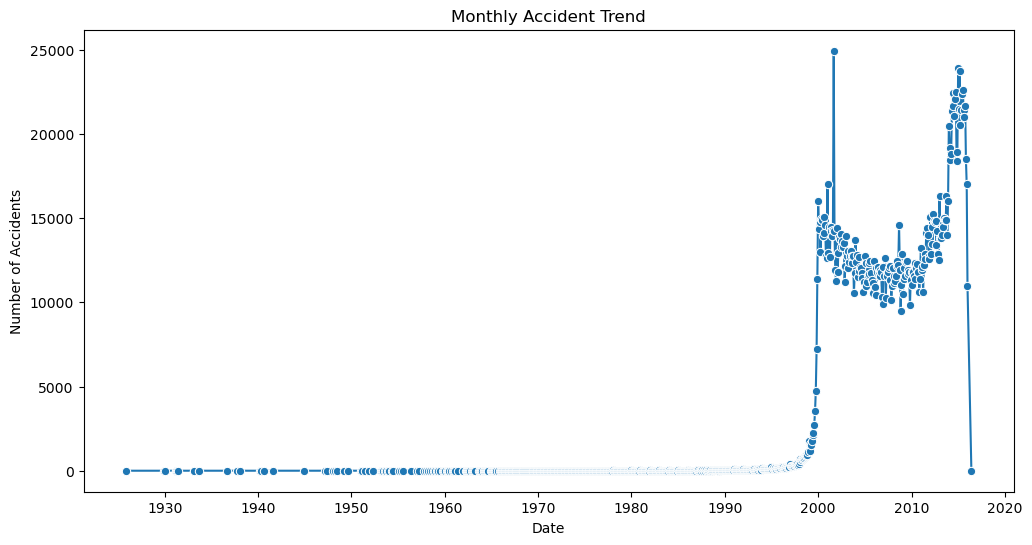

In [19]:
# -----------------------------
# 10. Monthly Accident Trend
# -----------------------------
if "Accident_Month" in df.columns and "Accident_Year" in df.columns:
    monthly = df.groupby(["Accident_Year","Accident_Month"]).size().reset_index(name="Count")
    monthly["Date"] = pd.to_datetime(monthly["Accident_Year"].astype(str) + "-" + monthly["Accident_Month"].astype(str) + "-01")
    plt.figure(figsize=(12,6))
    sns.lineplot(x="Date", y="Count", data=monthly, marker="o")
    plt.title("Monthly Accident Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Accidents")
    plt.savefig(os.path.join(OUTPUT_DIR, "monthly_trend.png"))
    plt.show()